# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my report, I've chosen to investigate the TMDb database. Throughout the course of this project, I will uncover critical findings within the database.I am seeking to answer the following questions. What relationship does popularity have with budget? Does runtime affect popularity? How have budgets changed over time? In answering these quesitons, I will be able to relay trends to movie companies so that they might be able to produce the most popular movies that they can.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Some general properties of the dataset.

First, I used df.info() df.shape and df.describe() to explore the dataset. I found that the dataset had 10,866 rows with 21 columns - meaning that we are looking at 10,866 movies over 21 different categories. From df.info(), I found that the following columns were missing values: cast, homepage, director, tagline, keywords, overview, genres, production_companies. 

From here, I used sum(df.duplicated()) to find that there was one duplicated row.

I also used df.isnull().sum() to assess how many rows were missing data in each column.

### General Properties

In [58]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [59]:
df.shape

(10866, 21)

In [60]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [61]:
df = pd.read_csv('tmdb-movies.csv')
sum(df.duplicated())

1

In [62]:
df = pd.read_csv('tmdb-movies.csv')
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

For this project, there were certain columns that I did not need to answer my questions. I used pandas' drop function to help with this. The questions I was focusing on for this project centered around film popularity vs. runtime, budget, and release date - so there were many colummns from this dataset that I did not need. I used df.drop() to remove id, imdb_db, cast, homepage, director, tagline, keywords, overview, production_companies, vogte_count and vote_average. I confirmed these changes using df_head.

I chose to use 'budget_adj' and 'revenue_adj' instead of 'budget' and 'revenue' to accomodate for inflation and to more accurately compare these movies against each other despite the fact that these movies were released over a large range of time.

I also dropped the one duplicate row we had using dr.drop_duplicates(inplace=True) and confirmed the correction by using sum(df.duplicated()).

Next, I wanted to drop rows with missing values. I did that by using df.dropna(inplace=True) and confirmed that using df.isnull().sum().any().

In [63]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


In [64]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [65]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [66]:
df.dropna(inplace=True)
df.isnull().sum().any()

False

In [67]:
df.to_csv('tmbd-movies_edited.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What relationship does popularity have with budget?

Text(0.5,1,'Budget vs. Popularity')

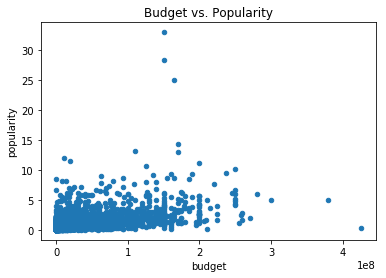

In [68]:
df.plot(x='budget', y='popularity', kind='scatter')
plt.title('Budget vs. Popularity')

In this scatterplot, we do neither a positive nor a negative correlation between budget and popularity. We also see a few outliers in this graph.

Text(0,0.5,'Frequency')

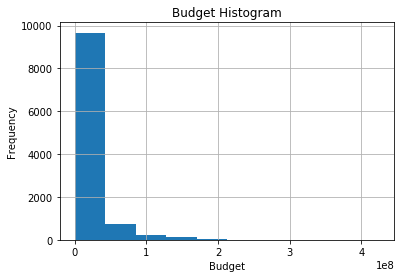

In [69]:
df['budget'].hist()
plt.title('Budget Histogram')
plt.xlabel('Budget')
plt.ylabel('Frequency')

This graph shows that almost all of the movies produced spent less than 100,000,000 dollars on their budget, with the vast majority spending less than $50,000,000 dollars.

Answer: We cannot say that movies that spend more money conclusively have higher levels of popularity. This data does not show any correlation, positive or negative, between popularity and budget. Our histogram shows that most movies spent less than 100,000,000 on their budget, with the vast majority spending less than half of that number.

### Research Question 2: How long are the most popular movies?

Text(0.5,1,'Runtime vs. Popularity')

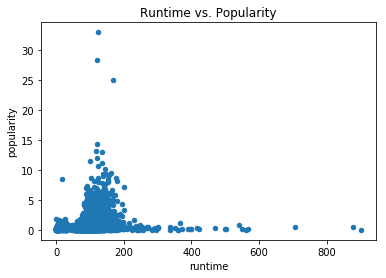

In [70]:
df.plot(x='runtime', y='popularity', kind='scatter')
plt.title('Runtime vs. Popularity')

We can see that most movies have a runtime between 50-200 minutes, although there are certainly some movies that exist above and below that timeframe. Again, we see some outliers for runtime and popularity.

Text(0,0.5,'Frequency')

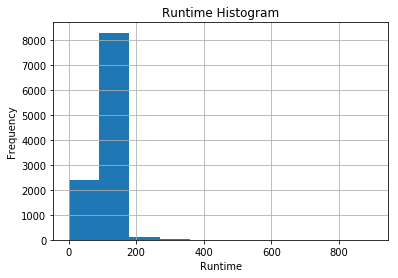

In [71]:
df['runtime'].hist()
plt.title('Runtime Histogram')
plt.xlabel('Runtime')
plt.ylabel('Frequency')

Confirming what we saw in the scatterplot, almost all movies have a runtime of less than 200 minutes.

Answer: This graph shows us that all of the most popular movies seem to have runtimes under 200 minutes - any movies beyond that seem to have similar (low) levels of popularity regardless of the runtime. With that being said, our histogram shows us that the largest percentage all of the movies were between 100 and 200 minutes long.

### Research Question 3: How have budgets changed over time?

Text(0.5,1,'Release Year Histogram')

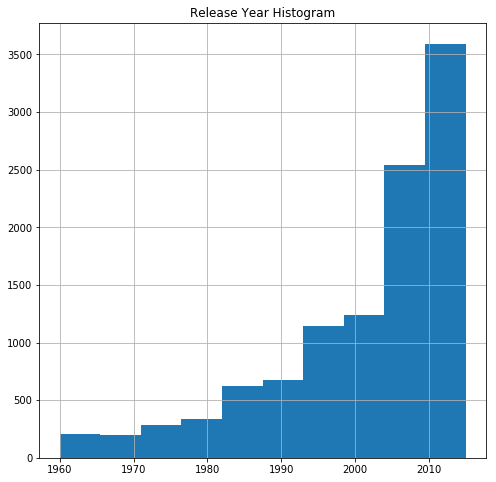

In [72]:
df['release_year'].hist(figsize=(8,8))
plt.title('Release Year Histogram')

Our distribution is heavily skewed to the left, showing that most of the movies analyzed in this database were released recently.

Text(0,0.5,'Frequency')

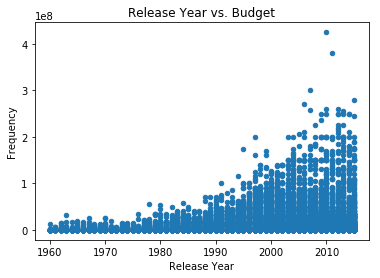

In [73]:
df.plot(x='release_year', y='budget', kind='scatter')
plt.title('Release Year vs. Budget')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

Again, we see left skew between release year and budget. Movies that were produced more recently showed higher budgets, in general, than movies released 30-40 years ago.

Answer: As time has gone on, movies have generally shown a steady increase in their budgets.

<a id='conclusions'></a>
## Conclusions

Question 1: We cannot say that movies that spend more money conclusively have higher levels of popularity. This data does not show any correlation, positive or negative, between popularity and budget.

Question 2: This graph shows us that all of the most popular movies seem to have runtimes under 200 minutes - any movies beyond that seem to have similar (low) levels of popularity regardless of the runtime. With that being said, our histogram shows us that the largest percentage all of the movies were between 100 and 200 minutes long.

Question 3: We can clearly see that as time has gone on, movies have generally shown a steady increase in their budgets.

Limitations: Not every movie since 1960 was included in this dataset. There were also some significant outliers that would likely need to be addressed. There were also some null or zero values in certain categories such as 'budget' and 'revenue' that may have impacted the calculations of this data. We are also unsure if this dataset can properly represent the population or not, as we are not given info on demographics of voters or who was most likely to see which movie(s).

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0